In [2]:
import tal
import os

# TODO: if you want to follow this tutorial,
# you need to have rendered the scene using the "tal render nlos-z" shell command
# See README.md for more information
# Write here   vvvvvvvvvvvvvvv   the path to your rendered scene
root = 'nlos-z/YYYYMMDD-HHMMSS'

data = tal.io.read_capture(os.path.join(root, 'nlos-z.hdf5'))

In [4]:
# because this is a test scene, we know the hidden geometry
# is located at Z = 1
# this volume_xyz is coplanar to the relay wall (rw) at Z=1
volume_xyz = tal.reconstruct.get_volume_project_rw(data, depths=[1.0,])
print(volume_xyz.shape)

(64, 64, 1, 3)


tal.reconstruct.filter_H: Using wavelengths from 0.0399m to 0.1288m


tal.reconstruct.filter_H (pf, 3/3): 100%|██████████| 3/3 [00:00<00:00, 29.68it/s]

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3


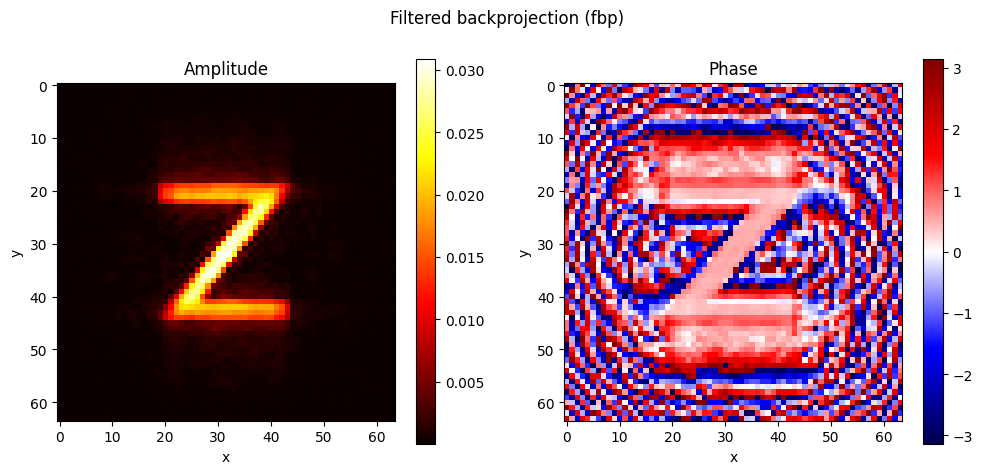

In [5]:
# Here is a reconstruction using filtered backprojection
# By default:
# * The filtering applied, by default, is the phasor field filter with the
#       wl_mean and wl_sigma specified
# * It is single-threaded (see tal.resources to see how to multi-thread)
H_1 = tal.reconstruct.fbp.solve(data,
                                wl_mean=0.06, wl_sigma=0.06,
                                volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)
tal.plot.amplitude_phase(H_1, title='Filtered backprojection (fbp)')

tal.reconstruct.filter_H: Using wavelengths from 0.0399m to 0.1288m
tal.resources: Using 8 CPU processes and downscale 8.


tal.resources progress: 100%|██████████| 8/8 [00:00<00:00, 508.82it/s]

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.resources: Using 8 CPU processes and downscale 8.



tal.resources progress: 100%|██████████| 8/8 [00:00<00:00, 30559.59it/s]


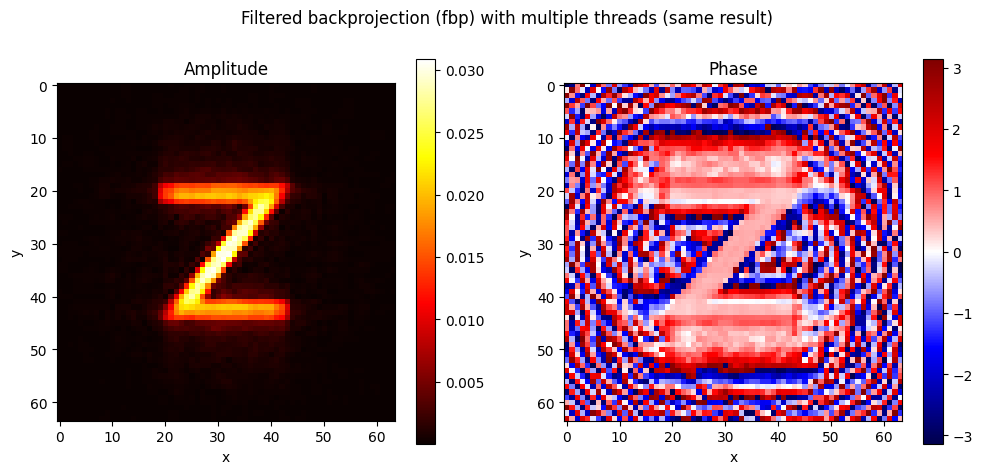

In [6]:
# Using tal.resources you can set the number of threads
#with tal.resources(4):  # 4 threads
with tal.resources('max'):  # max number of threads
    H_1 = tal.reconstruct.fbp.solve(data,
                                    wl_mean=0.06, wl_sigma=0.06,
                                    volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)
    tal.plot.amplitude_phase(H_1, title='Filtered backprojection (fbp) with multiple threads (same result)')

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for camera convolutions.
tal.reconstruct.pf_dev: Using 41 wavelengths from 0.0400m to 0.1200m
tal.reconstruct.pf_dev: projector_focus_mode=confocal


tal.reconstruct.pf_dev propagation (1/2): 64it [00:00, 126.58it/s]                       
tal.reconstruct.pf_dev ifft (2/2): 100%|██████████| 41/41 [00:00<00:00, 204.15it/s]


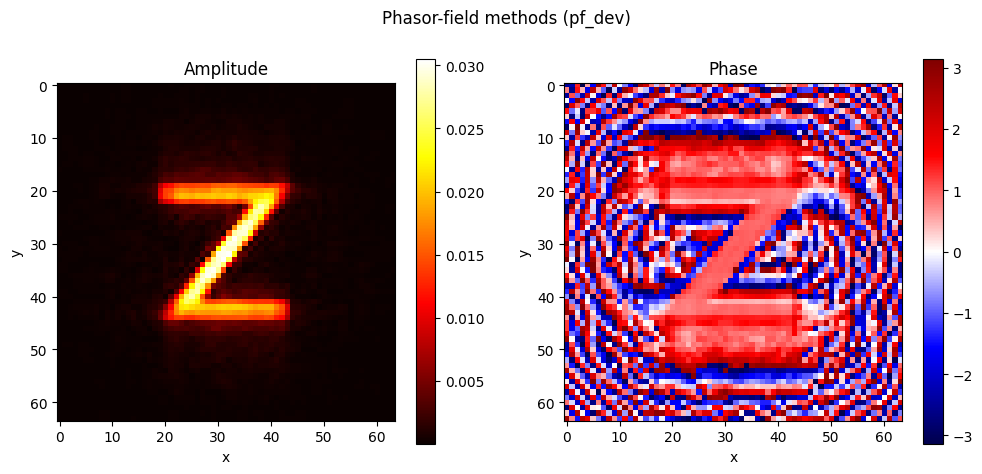

In [7]:
# When your volume_xyz is coplanar to the relay wall,
# pf_dev implements the optimization in the Phasor Field Diffraction paper
# which can be even faster
H_1 = tal.reconstruct.pf_dev.solve(data,
                                   wl_mean=0.06, wl_sigma=0.06,
                                   volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)
tal.plot.amplitude_phase(H_1, title='Phasor-field methods (pf_dev)')

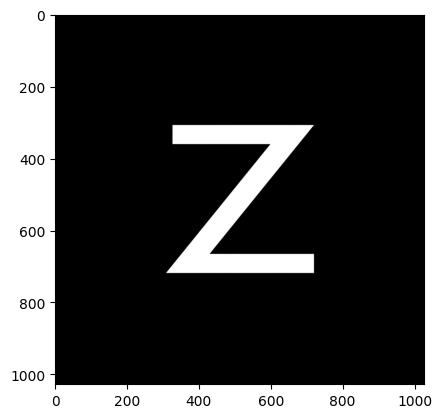

In [8]:
# Ground truth depth and normals data
import matplotlib.pyplot as plt

depth = data.scene_info['ground_truth']['depth'][..., 2]

plt.imshow(depth, cmap='gray')

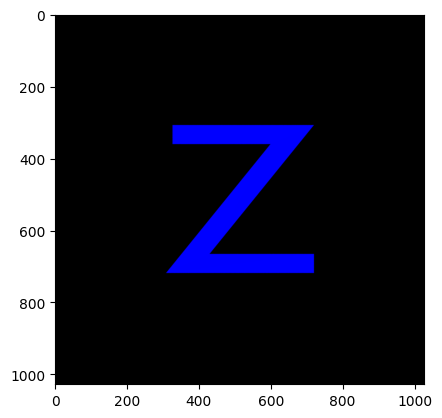

In [9]:
import numpy as np

# Normals are (0, 0, -1) (along negative depth axis i.e. towards relay wall)
normals = data.scene_info['ground_truth']['normals']

plt.imshow(np.clip(normals * -1, 0, 1))